## Setup the environment

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation
Creating series which are one dimensional ndarray with axis labels

In [2]:
s=pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a Data Frame by passing a numpy array, with a dattime index and labeled columns:

In [3]:
dates=pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Use the generated dates column to set up the rownames for the next data frame

In [4]:
df=pd.DataFrame(np.random.randn(6,4),index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


Create a dataframe by passing a dictionary of objects that can be converted to series like

In [5]:
df2=pd.DataFrame({'A':1.,
                  'B':pd.Timestamp('20130102'),
                  'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D':np.array([3]*4,dtype='int32'),
                  'E':pd.Categorical(['test','train','test','train']),
                 'F':'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing the data 

In [7]:
df.head()

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311


In [8]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


Display the index, columns, and the underlying numpy data

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [12]:
df.values

array([[-1.94167627, -1.41285277,  0.26771186,  1.90093398],
       [ 0.4355676 , -2.1176262 , -1.74855121,  0.52937016],
       [-0.34888088,  0.80941205,  1.45912913, -0.00657156],
       [-1.03296722,  0.4128032 ,  1.08162781,  0.58787875],
       [ 0.27981839, -0.27776309,  0.25054562,  0.57031057],
       [-0.20285324, -2.56187379, -1.45961577, -1.0000689 ]])

The following shows that by a simple call to the describe function on a given dataframe, a variety of data summary is created

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.468499,-0.857983,-0.024859,0.430309
std,0.888939,1.380549,1.312831,0.943803
min,-1.941676,-2.561874,-1.748551,-1.000069
25%,-0.861946,-1.941433,-1.032075,0.127414
50%,-0.275867,-0.845308,0.259129,0.549840
75%,0.159150,0.240162,0.878149,0.583487
max,0.435568,0.809412,1.459129,1.900934


Transposing the data 

In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.941676,0.435568,-0.348881,-1.032967,0.279818,-0.202853
B,-1.412853,-2.117626,0.809412,0.412803,-0.277763,-2.561874
C,0.267712,-1.748551,1.459129,1.081628,0.250546,-1.459616
D,1.900934,0.529370,-0.006572,0.587879,0.570311,-1.000069


In [15]:
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


Sorting Operations

Sorting a dataframe based on the indexed called?

In [16]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-01,-1.941676,-1.412853,0.267712,1.900934


In [17]:
df2.sort_index(axis=0)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Sorting by values

In [18]:
df.sort_values(by='B',ascending=False)

,A,B,C,D
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


## Selection 

### Getting 

Selecting a single column, which yields a series, equivalent to df.A

In [19]:
df['A']

2013-01-01   -1.941676
2013-01-02    0.435568
2013-01-03   -0.348881
2013-01-04   -1.032967
2013-01-05    0.279818
2013-01-06   -0.202853
Freq: D, Name: A, dtype: float64

In [20]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [21]:
df2['B']

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
Name: B, dtype: datetime64[ns]

Selecting multiple different columns

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572


In [23]:
df[0:]

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


In [24]:
df2[0:]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Selection by label

This is for getting a cross section using a label/ Or rather using this as a way to obtain the 

In [25]:
df.loc[dates[5]]

A   -0.202853
B   -2.561874
C   -1.459616
D   -1.000069
Name: 2013-01-06 00:00:00, dtype: float64

In [26]:
df

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


Selecting multiple different rows by label

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.941676,-1.412853
2013-01-02,0.435568,-2.117626
2013-01-03,-0.348881,0.809412
2013-01-04,-1.032967,0.412803
2013-01-05,0.279818,-0.277763
2013-01-06,-0.202853,-2.561874


In [28]:
df.loc['20130102':'20130106',["A","B"]]

,A,B
2013-01-02,0.435568,-2.117626
2013-01-03,-0.348881,0.809412
2013-01-04,-1.032967,0.412803
2013-01-05,0.279818,-0.277763
2013-01-06,-0.202853,-2.561874


Reduction in the dimensions of the returned object

In [29]:
df.loc['20130102',['A','B']]

A    0.435568
B   -2.117626
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0],'A'
      ]

-1.9416762715140026

### Selection by position. 
Notice that when selecting values by position instead of the columns or labels. The difference in the key word API invoked. One is using loc vs iloc

In [31]:
df.iloc[3]

A   -1.032967
B    0.412803
C    1.081628
D    0.587879
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


using integers to directly slice the dataframe

In [33]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.032967,0.412803
2013-01-05,0.279818,-0.277763


In [34]:
df2.iloc[1:,2:]

,C,D,E,F
1,1.0,3,train,foo
2,1.0,3,test,foo
3,1.0,3,train,foo


Slicing rows explicitly

In [35]:
df.iloc[1,:]

A    0.435568
B   -2.117626
C   -1.748551
D    0.529370
Name: 2013-01-02 00:00:00, dtype: float64

In [36]:
df

,A,B,C,D
2013-01-01,-1.941676,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


For selecting columns explicitly

In [37]:
df.iloc[:,2]

2013-01-01    0.267712
2013-01-02   -1.748551
2013-01-03    1.459129
2013-01-04    1.081628
2013-01-05    0.250546
2013-01-06   -1.459616
Freq: D, Name: C, dtype: float64

### Boolean Indexing
Using a single column's values to select data

In [38]:
df[df.A>0]

,A,B,C,D
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-05,0.279818,-0.277763,0.250546,0.570311


In [39]:
df[df.B>1]

,A,B,C,D


Selecting values from a data frame where a boolean conditions is met

In [40]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.267712,1.900934
2013-01-02,0.435568,NaN,NaN,0.529370
2013-01-03,NaN,0.809412,1.459129,NaN
2013-01-04,NaN,0.412803,1.081628,0.587879
2013-01-05,0.279818,NaN,0.250546,0.570311
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [41]:
df2=df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.941676,-1.412853,0.267712,1.900934,one
2013-01-02,0.435568,-2.117626,-1.748551,0.529370,one
2013-01-03,-0.348881,0.809412,1.459129,-0.006572,two
2013-01-04,-1.032967,0.412803,1.081628,0.587879,three
2013-01-05,0.279818,-0.277763,0.250546,0.570311,four
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069,three


In [42]:
df2[df2['E'].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,-0.348881,0.809412,1.459129,-0.006572,two
2013-01-05,0.279818,-0.277763,0.250546,0.570311,four


### Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102",periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [44]:
df.at[dates[0],'A']=0

In [45]:
df

,A,B,C,D
2013-01-01,0.000000,-1.412853,0.267712,1.900934
2013-01-02,0.435568,-2.117626,-1.748551,0.529370
2013-01-03,-0.348881,0.809412,1.459129,-0.006572
2013-01-04,-1.032967,0.412803,1.081628,0.587879
2013-01-05,0.279818,-0.277763,0.250546,0.570311
2013-01-06,-0.202853,-2.561874,-1.459616,-1.000069


Setting values by position within the data frame
Note that similar to the slicing and dicing the data frame by labels, the keyword is loc and when slicing and dicing the dataframe by values of the dataframe, iloc is used. In setting the values of a specific cell within a a dataframe using label at is used and conversely, when refering the the specific position within the cell, the iat keywork/API is used

In [46]:
df.iat[0,1]

-1.4128527671445921

In [47]:
df.iat[0,1]=1

In [48]:
df.loc[:,'D']=np.array([5]*len(df))

In [49]:
df

,A,B,C,D
2013-01-01,0.000000,1.000000,0.267712,5
2013-01-02,0.435568,-2.117626,-1.748551,5
2013-01-03,-0.348881,0.809412,1.459129,5
2013-01-04,-1.032967,0.412803,1.081628,5
2013-01-05,0.279818,-0.277763,0.250546,5
2013-01-06,-0.202853,-2.561874,-1.459616,5


In [50]:
df2=df.copy()

In [51]:
df2[df2>0]=-df2
df2

,A,B,C,D
2013-01-01,0.000000,-1.000000,-0.267712,-5
2013-01-02,-0.435568,-2.117626,-1.748551,-5
2013-01-03,-0.348881,-0.809412,-1.459129,-5
2013-01-04,-1.032967,-0.412803,-1.081628,-5
2013-01-05,-0.279818,-0.277763,-0.250546,-5
2013-01-06,-0.202853,-2.561874,-1.459616,-5


## Missing Data
Pandas primarily uses the value np.nan to represent missing data. Missing data by default isn't included as a part of the computation. 
Reindexing allows to change/add/delete the index on a specific axis. 


In [52]:
df1=df.reindex(index=dates[:4],columns=list(df.columns)+['E'])

In [53]:
df1

,A,B,C,D,E
2013-01-01,0.000000,1.000000,0.267712,5,NaN
2013-01-02,0.435568,-2.117626,-1.748551,5,NaN
2013-01-03,-0.348881,0.809412,1.459129,5,NaN
2013-01-04,-1.032967,0.412803,1.081628,5,NaN


In [54]:
df1.loc[dates[0]:dates[1],'E']=1

In [55]:
df1

,A,B,C,D,E
2013-01-01,0.000000,1.000000,0.267712,5,1.0
2013-01-02,0.435568,-2.117626,-1.748551,5,1.0
2013-01-03,-0.348881,0.809412,1.459129,5,NaN
2013-01-04,-1.032967,0.412803,1.081628,5,NaN


Dropping any rows that have missing data

In [56]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,0.000000,1.000000,0.267712,5,1.0
2013-01-02,0.435568,-2.117626,-1.748551,5,1.0


In [57]:
df1

,A,B,C,D,E
2013-01-01,0.000000,1.000000,0.267712,5,1.0
2013-01-02,0.435568,-2.117626,-1.748551,5,1.0
2013-01-03,-0.348881,0.809412,1.459129,5,NaN
2013-01-04,-1.032967,0.412803,1.081628,5,NaN


In [58]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,1.000000,0.267712,5,1.0
2013-01-02,0.435568,-2.117626,-1.748551,5,1.0
2013-01-03,-0.348881,0.809412,1.459129,5,5.0
2013-01-04,-1.032967,0.412803,1.081628,5,5.0


In [59]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


In [60]:
pd.__version__

'0.21.0'

## Operations
### Stats
Performing descriptive statistics

In [61]:
df3=pd.DataFrame(np.random.randn(6,7),
                 index=pd.date_range('20170101',periods=6),columns=list("ABCDEFG"))

In [62]:
df3.mean()

A    0.310063
B    0.272046
C    0.180530
D   -0.179559
E   -0.625933
F    0.392774
G    0.102887
dtype: float64

Calculating the mean of a specific column

In [63]:
df3.mean(1)

2017-01-01    0.004014
2017-01-02   -0.086805
2017-01-03   -0.224136
2017-01-04    0.150124
2017-01-05   -0.283568
2017-01-06    0.828493
Freq: D, dtype: float64

In [64]:
df3

,A,B,C,D,E,F,G
2017-01-01,-0.325091,1.501309,-0.116862,-0.683744,-1.320661,0.248472,0.724673
2017-01-02,0.661035,-2.745281,1.099046,0.328742,-0.120031,0.646882,-0.478033
2017-01-03,-0.593771,-0.058253,0.398479,-1.432691,-0.273606,0.524259,-0.133371
2017-01-04,0.655516,0.271186,0.310561,0.592398,-0.528205,-0.865631,0.615045
2017-01-05,0.115720,0.626891,0.162346,-1.702349,-1.633701,1.243789,-0.797674
2017-01-06,1.346967,2.036424,-0.770393,1.820289,0.120604,0.558875,0.686684


In [65]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [66]:
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [67]:
df.sub(s,axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.348881,-0.190588,0.459129,4.0
2013-01-04,-4.032967,-2.587197,-1.918372,2.0
2013-01-05,-4.720182,-5.277763,-4.749454,0.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply
This is similar to r. This applies functions to the data directly

In [68]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,1.000000,0.267712,5
2013-01-02,0.435568,-1.117626,-1.480839,10
2013-01-03,0.086687,-0.308214,-0.021710,15
2013-01-04,-0.946281,0.104589,1.059918,20
2013-01-05,-0.666462,-0.173174,1.310463,25
2013-01-06,-0.869315,-2.735048,-0.149153,30


In [69]:
df.apply(lambda x:x.max()-x.min())

A    1.468535
B    3.561874
C    3.207680
D    0.000000
dtype: float64

## Histogramming


In [70]:
s=pd.Series(np.random.randint(0,7,10))

In [71]:
s

0    0
1    4
2    3
3    3
4    6
5    6
6    5
7    4
8    3
9    6
dtype: int64

In [72]:
s.value_counts()

6    3
3    3
4    2
5    1
0    1
dtype: int64

## String Methods

In [73]:
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','do','cat'])

In [74]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7      do
8     cat
dtype: object

In [75]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7      do
8     cat
dtype: object

## Merging

In [76]:
df=pd.DataFrame(np.random.randn(10,4))

In [77]:
df

,0,1,2,3
0,-0.702464,-0.881052,-1.490023,-0.056479
1,-0.962016,-0.238664,-0.355485,0.075374
2,0.429267,-0.946372,2.382330,1.284660
3,0.746172,0.539898,1.181734,-1.004999
4,-0.316322,-0.335480,0.344020,0.150222
5,-0.630000,-1.004900,-0.046401,0.752110
6,0.694104,1.021582,-0.774522,-0.845962
7,0.061223,1.268078,-0.197754,-0.738386
8,0.787764,-0.966238,1.389297,0.552515
9,-1.073559,-0.232256,0.568424,0.904502


In [78]:
#Breaking it into pieces
pieces=[df[:3],df[3:7],df[7:]]

In [79]:
pieces

[          0         1         2         3
 0 -0.702464 -0.881052 -1.490023 -0.056479
 1 -0.962016 -0.238664 -0.355485  0.075374
 2  0.429267 -0.946372  2.382330  1.284660,
           0         1         2         3
 3  0.746172  0.539898  1.181734 -1.004999
 4 -0.316322 -0.335480  0.344020  0.150222
 5 -0.630000 -1.004900 -0.046401  0.752110
 6  0.694104  1.021582 -0.774522 -0.845962,
           0         1         2         3
 7  0.061223  1.268078 -0.197754 -0.738386
 8  0.787764 -0.966238  1.389297  0.552515
 9 -1.073559 -0.232256  0.568424  0.904502]

In [80]:
pd.concat(pieces)

,0,1,2,3
0,-0.702464,-0.881052,-1.490023,-0.056479
1,-0.962016,-0.238664,-0.355485,0.075374
2,0.429267,-0.946372,2.382330,1.284660
3,0.746172,0.539898,1.181734,-1.004999
4,-0.316322,-0.335480,0.344020,0.150222
5,-0.630000,-1.004900,-0.046401,0.752110
6,0.694104,1.021582,-0.774522,-0.845962
7,0.061223,1.268078,-0.197754,-0.738386
8,0.787764,-0.966238,1.389297,0.552515
9,-1.073559,-0.232256,0.568424,0.904502


## SQL style merges/Joins

In [81]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [82]:
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
right

,key,rval
0,foo,4
1,foo,5


In [83]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Appending rows to the dataframe

In [84]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])

In [85]:
df

,A,B,C,D
0,0.354812,0.528413,-1.257724,-0.913841
1,0.846520,1.674734,-2.264611,-0.105883
2,0.430647,1.179804,1.372428,0.138286
3,0.416774,2.366067,1.106448,0.422937
4,-0.921435,-0.029952,-0.541947,1.041437
5,0.266137,0.599441,-0.546073,1.087683
6,1.432874,0.651157,1.713696,-1.098223
7,0.640289,-0.137704,-0.623703,-0.700628


In [86]:
s=df.iloc[3]
s

A    0.416774
B    2.366067
C    1.106448
D    0.422937
Name: 3, dtype: float64

In [87]:
df.append(s,ignore_index=True)

,A,B,C,D
0,0.354812,0.528413,-1.257724,-0.913841
1,0.846520,1.674734,-2.264611,-0.105883
2,0.430647,1.179804,1.372428,0.138286
3,0.416774,2.366067,1.106448,0.422937
4,-0.921435,-0.029952,-0.541947,1.041437
5,0.266137,0.599441,-0.546073,1.087683
6,1.432874,0.651157,1.713696,-1.098223
7,0.640289,-0.137704,-0.623703,-0.700628
8,0.416774,2.366067,1.106448,0.422937


## Grouping
Group by operations have the following several processes:
1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure


In [88]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})

In [89]:
df

,A,B,C,D
0,foo,one,-0.114256,-0.328000
1,bar,one,-0.477554,-1.653406
2,foo,two,0.443537,-1.487089
3,bar,three,-1.371853,0.134581
4,foo,two,0.161555,0.614461
5,bar,two,0.423226,0.812480
6,foo,one,1.958309,0.390780
7,foo,three,0.609632,3.112907


In [90]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.426181,-0.706345
foo,3.058777,2.303059


In [91]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.477554 -1.653406
    three -1.371853  0.134581
    two    0.423226  0.812480
foo one    1.844053  0.062780
    three  0.609632  3.112907
    two    0.605092 -0.872629

## Reshaping
Stacking

In [92]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))

In [93]:
print(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))

In [94]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [95]:
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [96]:
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])

In [97]:
df

A         B
first second                    
bar   one    -0.556738  0.275007
      two     0.125931  0.491730
baz   one     1.348264  1.543393
      two     0.155863  0.395095
foo   one     0.272282  0.463155
      two    -0.730862  0.808126
qux   one    -0.339169 -0.540747
      two    -0.393893  0.250150

In [98]:
df2=df[:4]

In [99]:
df2

A         B
first second                    
bar   one    -0.556738  0.275007
      two     0.125931  0.491730
baz   one     1.348264  1.543393
      two     0.155863  0.395095

In [100]:
stacked=df2.stack()

In [101]:
stacked

first  second   
bar    one     A   -0.556738
               B    0.275007
       two     A    0.125931
               B    0.491730
baz    one     A    1.348264
               B    1.543393
       two     A    0.155863
               B    0.395095
dtype: float64

Stack means compressing levels in data frame's columns

In [102]:
stacked1=df.stack()
stacked1

first  second   
bar    one     A   -0.556738
               B    0.275007
       two     A    0.125931
               B    0.491730
baz    one     A    1.348264
               B    1.543393
       two     A    0.155863
               B    0.395095
foo    one     A    0.272282
               B    0.463155
       two     A   -0.730862
               B    0.808126
qux    one     A   -0.339169
               B   -0.540747
       two     A   -0.393893
               B    0.250150
dtype: float64

In [103]:
#unstack always unstacks the last level
stacked.unstack()

A         B
first second                    
bar   one    -0.556738  0.275007
      two     0.125931  0.491730
baz   one     1.348264  1.543393
      two     0.155863  0.395095

In [104]:
stacked1.unstack(2,1)

A         B
first second                    
bar   one    -0.556738  0.275007
      two     0.125931  0.491730
baz   one     1.348264  1.543393
      two     0.155863  0.395095
foo   one     0.272282  0.463155
      two    -0.730862  0.808126
qux   one    -0.339169 -0.540747
      two    -0.393893  0.250150

### Pivot Tables

In [105]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})

In [106]:
df

,A,B,C,D,E
0,one,A,foo,-0.170935,-0.565168
1,one,B,foo,-1.443838,0.149294
2,two,C,foo,1.983903,-0.728688
3,three,A,bar,0.939458,-0.326415
4,one,B,bar,-0.092363,0.451699
5,one,C,bar,-1.121657,-0.220255
6,two,A,foo,0.584429,-0.326586
7,three,B,foo,0.337724,-0.159184
8,one,C,foo,0.493879,0.672478
9,one,A,bar,0.761686,0.285346


In [107]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])
#This is easily accomplished by clearly specifying the values, index, columns of the table wishing to be produced

C             bar       foo
A     B                    
one   A  0.761686 -0.170935
      B -0.092363 -1.443838
      C -1.121657  0.493879
three A  0.939458       NaN
      B       NaN  0.337724
      C  0.115786       NaN
two   A       NaN  0.584429
      B -0.401551       NaN
      C       NaN  1.983903

## Time Series

In [108]:
rng=pd.date_range('1/1/2012',periods=100,freq='s')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [109]:
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2012-01-01 00:00:00    278
2012-01-01 00:00:01    402
2012-01-01 00:00:02    341
2012-01-01 00:00:03    461
2012-01-01 00:00:04    434
2012-01-01 00:00:05     27
2012-01-01 00:00:06    182
2012-01-01 00:00:07    390
2012-01-01 00:00:08    391
2012-01-01 00:00:09    253
2012-01-01 00:00:10    352
2012-01-01 00:00:11    141
2012-01-01 00:00:12    209
2012-01-01 00:00:13    122
2012-01-01 00:00:14    458
2012-01-01 00:00:15    172
2012-01-01 00:00:16    250
2012-01-01 00:00:17    112
2012-01-01 00:00:18    375
2012-01-01 00:00:19    251
2012-01-01 00:00:20     69
2012-01-01 00:00:21     33
2012-01-01 00:00:22     97
2012-01-01 00:00:23    231
2012-01-01 00:00:24     19
2012-01-01 00:00:25    422
2012-01-01 00:00:26    378
2012-01-01 00:00:27    267
2012-01-01 00:00:28    267
2012-01-01 00:00:29    101
                      ... 
2012-01-01 00:01:10    124
2012-01-01 00:01:11    164
2012-01-01 00:01:12     16
2012-01-01 00:01:13    223
2012-01-01 00:01:14     19
2012-01-01 00:01:15     20
2

In [110]:
ts.resample('5Min').sum()

2012-01-01    22710
Freq: 5T, dtype: int64

Time Zone representation

In [111]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.532059
2012-03-07   -0.174975
2012-03-08   -0.200005
2012-03-09    0.835507
2012-03-10    0.010756
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-06 00:00:00+00:00   -0.532059
2012-03-07 00:00:00+00:00   -0.174975
2012-03-08 00:00:00+00:00   -0.200005
2012-03-09 00:00:00+00:00    0.835507
2012-03-10 00:00:00+00:00    0.010756
Freq: D, dtype: float64

In [114]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.532059
2012-03-06 19:00:00-05:00   -0.174975
2012-03-07 19:00:00-05:00   -0.200005
2012-03-08 19:00:00-05:00    0.835507
2012-03-09 19:00:00-05:00    0.010756
Freq: D, dtype: float64

Converting between time span representations

In [115]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')

In [116]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [117]:
ts

2012-01-31   -0.616769
2012-02-29    1.243906
2012-03-31   -0.908919
2012-04-30    0.074767
2012-05-31   -0.056174
Freq: M, dtype: float64

In [118]:
ps=ts.to_period()

In [119]:
ps.to_timestamp()

2012-01-01   -0.616769
2012-02-01    1.243906
2012-03-01   -0.908919
2012-04-01    0.074767
2012-05-01   -0.056174
Freq: MS, dtype: float64

## Categoricals


In [120]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],"raw_grade":["a","b","b","a","a","e"]})

In [121]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [122]:
df["grade"]=df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Categorical variable can be renamed to make more sense

In [123]:
df["grade"].cat.categories=["very good","good","very bad"]

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

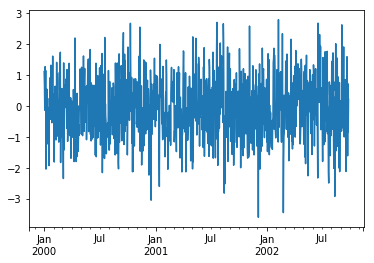

In [128]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts.plot()

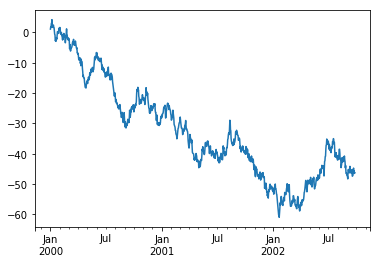

In [129]:
ts=ts.cumsum()
ts.plot()

In [130]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])

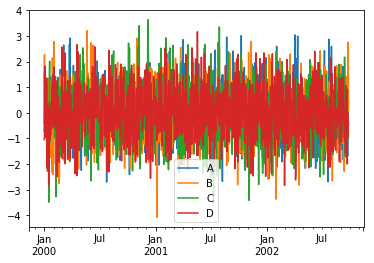

In [131]:
df.plot()

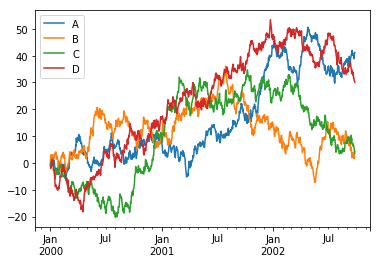

In [132]:
df=df.cumsum()
df.plot()

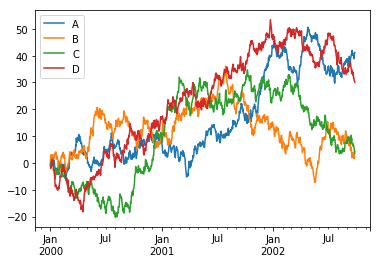

In [133]:
plt.figure();df.plot();plt.legend(loc='best')

## Getting Data in/Out

In [134]:
df.to_csv("foo.csv")

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.404987,0.670672,-0.720904,-1.043627
1,2000-01-02,1.207872,2.940599,-0.694511,-2.012272
2,2000-01-03,0.866770,2.422143,-0.028341,-2.030179
3,2000-01-04,0.146139,2.016101,-0.486065,-0.208470
4,2000-01-05,0.354558,2.174891,0.513795,0.520621
5,2000-01-06,1.583859,3.057910,1.083310,-0.436088
6,2000-01-07,1.327530,2.883889,0.656719,-0.624992
7,2000-01-08,1.528499,2.805763,0.144759,-0.270962
8,2000-01-09,1.044423,3.024476,-0.922341,1.082893
9,2000-01-10,2.128601,2.933902,-0.832552,-0.638534


## HDF5
This is about reading and writing to HDFStores


In [138]:
df.to_hdf('foo.h5','df')
#There are actually some issues related to executing this command

## Excel

In [137]:
df.to_excel('foo.xlsx',sheet_name='Sheet1')

In [139]:
pd.read_excel('foo.xlsx','Sheet1',index_col=None,na_values=['NA'])

,A,B,C,D
2000-01-01,-0.404987,0.670672,-0.720904,-1.043627
2000-01-02,1.207872,2.940599,-0.694511,-2.012272
2000-01-03,0.866770,2.422143,-0.028341,-2.030179
2000-01-04,0.146139,2.016101,-0.486065,-0.208470
2000-01-05,0.354558,2.174891,0.513795,0.520621
2000-01-06,1.583859,3.057910,1.083310,-0.436088
2000-01-07,1.327530,2.883889,0.656719,-0.624992
2000-01-08,1.528499,2.805763,0.144759,-0.270962
2000-01-09,1.044423,3.024476,-0.922341,1.082893
2000-01-10,2.128601,2.933902,-0.832552,-0.638534
